In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyspark
import random
import os
import glob
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql import functions as F


In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
df_dengue = pd.concat([pd.read_csv(f,sep=';',header=0, engine = 'python') for f in all_filenames ], sort = True)
df_dengue.to_csv( "dengue_csv_combined.csv", index=False, encoding='utf-8-sig')
df_dengue

,Tp_result_NS1,acido_pept,alrm_abdom,alrm_hemat,alrm_hepat,alrm_hipot,alrm_letar,alrm_liq,alrm_plaq,alrm_sang,...,tp_raca_cor,tp_result_exame,tp_result_histopatologia,tp_result_imunohistoquimica,tp_result_isolamento,tp_result_rtpcr,tp_sexo,tp_sorotipo,tp_zona_residencia,vomito
0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,4.0,4.0,4.0,4.0,NaN,F,NaN,1.0,2.0
1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,F,NaN,1.0,2.0
2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,2.0,M,NaN,1.0,2.0
3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,M,NaN,1.0,2.0
4,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,4.0,4.0,4.0,4.0,4.0,M,NaN,1.0,2.0
5,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,F,NaN,1.0,2.0
6,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,F,NaN,9.0,2.0
7,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,M,NaN,1.0,2.0
8,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,F,NaN,1.0,2.0
9,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,F,NaN,1.0,1.0


In [5]:
#df_dengue = pd.read_csv("caso-dengue2017.csv",sep=';',header=0, engine = 'python')
df_dengue = df_dengue.astype(str)
df_dengue.columns = [x.lower() for x in df_dengue.columns]
pd.set_option('display.max_columns', None)
df_dengue
#filescsv    

,tp_result_ns1,acido_pept,alrm_abdom,alrm_hemat,alrm_hepat,alrm_hipot,alrm_letar,alrm_liq,alrm_plaq,alrm_sang,alrm_vom,artralgia,artrite,auto_imune,cefaleia,clinc_chik,co_bairro_infeccao,co_bairro_residencia,co_cbo_ocupacao,co_cid,co_distrito_infeccao,co_distrito_residencia,co_logradouro_residencia,co_municipio_hospital,co_municipio_infeccao,co_municipio_notificacao,co_municipio_residencia,co_pais_infeccao,co_pais_residencia,co_regional_residencia,co_uf_hospital,co_uf_infeccao,co_uf_notificacao,co_uf_residencia,co_unidade_hospital,co_unidade_notificacao,conjutivite,diabetes,dor_costas,dor_retro,ds_semana_notificacao,ds_semana_sintoma,dt_alrm,dt_chil_s1,dt_chil_s2,dt_coleta_ns1,dt_coleta_exame,dt_coleta_isolamento,dt_coleta_rtpcr,dt_diagnostico_sintoma,dt_encerramento,dt_internacao,dt_investigacao,dt_nascimento,dt_notificacao,dt_obito,dt_prnt,exantema,febre,hematolog,hepatopat,hipertensao,id_regional,laco,leucopenia,mialgia,nausea,no_bairro_infeccao,no_bairro_residencia,nome_logradouro_residencia,notificacao_ano,nu_cep,nu_ddd_hospital,nu_idade,nu_notificacao,nu_telefone_hospital,petequia_n,renal,res_chiks1,res_chiks2,resul_prnt,st_doenca_trabalho,st_ocorreu_hospitalizacao,tp_autoctone_residencia,tp_classificacao_final,tp_criterio_confirmacao,tp_escolaridade,tp_evolucao_caso,tp_gestante,tp_notificacao,tp_raca_cor,tp_result_exame,tp_result_histopatologia,tp_result_imunohistoquimica,tp_result_isolamento,tp_result_rtpcr,tp_sexo,tp_sorotipo,tp_zona_residencia,vomito
0,4.0,2.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,2.0,2.0,2.0,nan,nan,77.0,nan,A90,nan,121.0,nan,nan,nan,261160,261160,nan,1,1497,nan,nan,26,26.0,nan,2711923,2.0,2.0,1.0,2.0,201701,201701,nan,nan,nan,nan,nan,nan,nan,1/1/17,1/20/17,nan,1/2/17,6/14/51,1/2/17,nan,nan,2.0,1.0,2.0,2.0,1.0,1497.0,2.0,2.0,1.0,2.0,nan,AFOGADOS,RUA GURUPE,2017,nan,nan,4065,2445239,nan,2.0,2.0,nan,nan,nan,nan,2.0,nan,10.0,2.0,9.0,1.0,5.0,2,9.0,4.0,4.0,4.0,4.0,nan,F,nan,1.0,2.0
1,nan,2.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.0,2.0,2.0,2.0,1.0,nan,20.0,nan,A90,nan,122.0,nan,nan,nan,261160,261160,nan,1,1497,nan,nan,26,26.0,nan,1120,2.0,2.0,2.0,2.0,201702,201701,nan,nan,nan,nan,nan,nan,nan,1/1/17,2/17/17,nan,1/10/17,9/25/80,1/10/17,nan,nan,2.0,2.0,2.0,2.0,2.0,1497.0,2.0,2.0,2.0,2.0,nan,BOA VIAGEM,RUA CHARLES DARWIN,2017,nan,nan,4036,2593056,nan,2.0,2.0,nan,nan,nan,nan,2.0,nan,5.0,1.0,9.0,1.0,5.0,2,9.0,nan,nan,nan,nan,nan,F,nan,1.0,2.0
2,nan,2.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,2.0,2.0,2.0,nan,nan,25.0,nan,A90,nan,122.0,nan,261160.0,nan,261160,261160,nan,1,1497,26.0,nan,26,26.0,nan,434,2.0,2.0,2.0,2.0,201701,201701,nan,nan,nan,nan,nan,nan,1/6/17,1/1/17,2/9/17,1/2/17,1/3/17,2/3/13,1/3/17,nan,nan,2.0,1.0,2.0,2.0,2.0,1497.0,2.0,2.0,1.0,2.0,nan,BRASILIA TEIMOSA,RUA ESPAROATE,2017,51010040.0,81.0,4003,2637131,21224193.0,2.0,2.0,nan,nan,nan,nan,1.0,nan,5.0,1.0,10.0,1.0,6.0,2,4.0,nan,nan,nan,nan,2.0,M,nan,1.0,2.0
3,nan,2.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,2.0,2.0,1.0,nan,nan,88.0,nan,A90,nan,547.0,nan,261160.0,nan,261160,261160,nan,1,1497,26.0,nan,26,26.0,2802783.0,2802783,2.0,2.0,2.0,2.0,201702,201701,nan,nan,nan,nan,nan,nan,nan,1/1/17,3/10/17,1/10/17,1/12/17,4/17/98,1/12/17,nan,nan,2.0,1.0,2.0,2.0,2.0,1497.0,2.0,2.0,1.0,2.0,nan,COHAB,RUA DOUTOR NILTON CARNEIRO,2017,51345365.0,nan,4018,2447041,nan,2.0,2.0,nan,nan,nan,nan,1.0,3.0,10.0,2.0,9.0,1.0,6.0,2,9.0,nan,nan,nan,nan,nan,M,nan,1.0,2.0
4,4.0,2.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.0,2.0,2.0,1.0,nan,nan,88.0,nan,A90,nan,547.0,nan,nan,nan,261160,261160,nan,1,1497,nan,nan,26,26.0,nan,6726852,2.0,2.0,2.0,2.0,201701,201701,nan,nan,nan,nan,nan,nan,nan,1/1/17,1/24/17,nan,1/5/17,10/20/13,1/5/17,nan,nan,2.0,1.0,2.0,2.0,2.0,1497.0,2.0,2.0,1.0,2.0,nan,COHAB,RUA CUIARI,2017,nan,nan,4003,2663542,nan,2.0,2.0,nan,nan,nan,nan,2.0,nan,10.0,2.0,10.0,1.0,6.0,2,9.0,4.0,4.0,4.0,4.0,4.0,M,nan,1.0,2.0
5,nan,2.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,2.0,2.0,2.0,nan,nan,23.0,nan,A90,nan,547.0,nan,nan,nan,260790,261160,nan,1,1497,nan,nan,26,26.0,nan,6558992,2.0,2

In [6]:
df_bairro = df_dengue.groupby('no_bairro_residencia')['no_bairro_residencia'].count().to_frame('quantidade').reset_index()
df_bairro.drop(df_bairro.tail(1).index,inplace=True)
df_bairro

,no_bairro_residencia,quantidade
0,AFLITOS,7
1,AFOGADOS,144
2,AGUA FRIA,151
3,ALTO DO MANDU,13
4,ALTO JOSE BONIFACIO,85
5,ALTO JOSE DO PINHO,32
6,ALTO SANTA TEREZINHA,24
7,APIPUCOS,13
8,AREIAS,112
9,ARRUDA,62


In [7]:
now = pd.Timestamp('now')
diseases = ['mialgia','cefaleia','exantema',"vomito","nausea","dor_costas",
            "conjutivite","artrite","artralgia","petequia_n","leucopenia",]
df_dengue['dt_nascimento'] = pd.to_datetime(df_dengue['dt_nascimento'], format='%m/%d/%y')
df_dengue['dt_nascimento'] = df_dengue['dt_nascimento'].where(df_dengue['dt_nascimento'] < now, df_dengue['dt_nascimento'] -  np.timedelta64(100, 'Y'))   # 2
df_dengue['age'] = (now - df_dengue['dt_nascimento']).astype('<m8[Y]')
pd.options.display.float_format = '{:,.0f}'.format
#print(filescsv['dt_nascimento'])
df_filtered = pd.DataFrame()
df_filtered = df_dengue.groupby(['age']).age.count().to_frame('quantidade').reset_index()
df_age = df_dengue.groupby(['age']).age.count().to_frame('quantidade').reset_index()

In [8]:
def contabilidade_sintomas(arraySintoma, frame):
    for lable in arraySintoma:
        quant_age = df_dengue.groupby(['age',lable])[lable].size().to_frame('quantidade')
        aux = (quant_age.loc[quant_age.index.get_level_values(1)=='1.0'])
        aux = aux.reset_index()
        frame['Q'+lable] = aux['quantidade']
        #frame['P'+lable] = (frame['Q'+lable]/frame['quantidade'])*100
    return frame
    #print(empty_frame)
    #print(var)
    #max_age_mialgia = var.loc[var['quantidade'].max()]['age']
    #max_age_mialgia

In [9]:
df_filtered = contabilidade_sintomas(diseases, df_filtered)
df_filtered

,age,quantidade,Qmialgia,Qcefaleia,Qexantema,Qvomito,Qnausea,Qdor_costas,Qconjutivite,Qartrite,Qartralgia,Qpetequia_n,Qleucopenia
0,0,8,3,3,3,2,1,1,4,2,1,8,2
1,1,88,23,24,44,31,10,3,6,4,5,16,5
2,2,121,31,21,71,44,12,1,3,1,8,10,4
3,3,88,28,17,59,41,11,1,1,2,4,7,7
4,4,92,29,34,33,41,11,2,4,3,3,4,12
5,5,121,52,64,38,69,14,6,2,2,6,9,14
6,6,111,53,63,35,51,11,4,3,1,9,5,13
7,7,121,46,67,31,55,16,2,2,4,11,6,15
8,8,142,63,86,26,70,19,1,4,2,9,11,14
9,9,135,67,87,40,53,20,5,4,2,10,3,15


In [10]:
df_bairro.set_index('no_bairro_residencia', inplace= True)

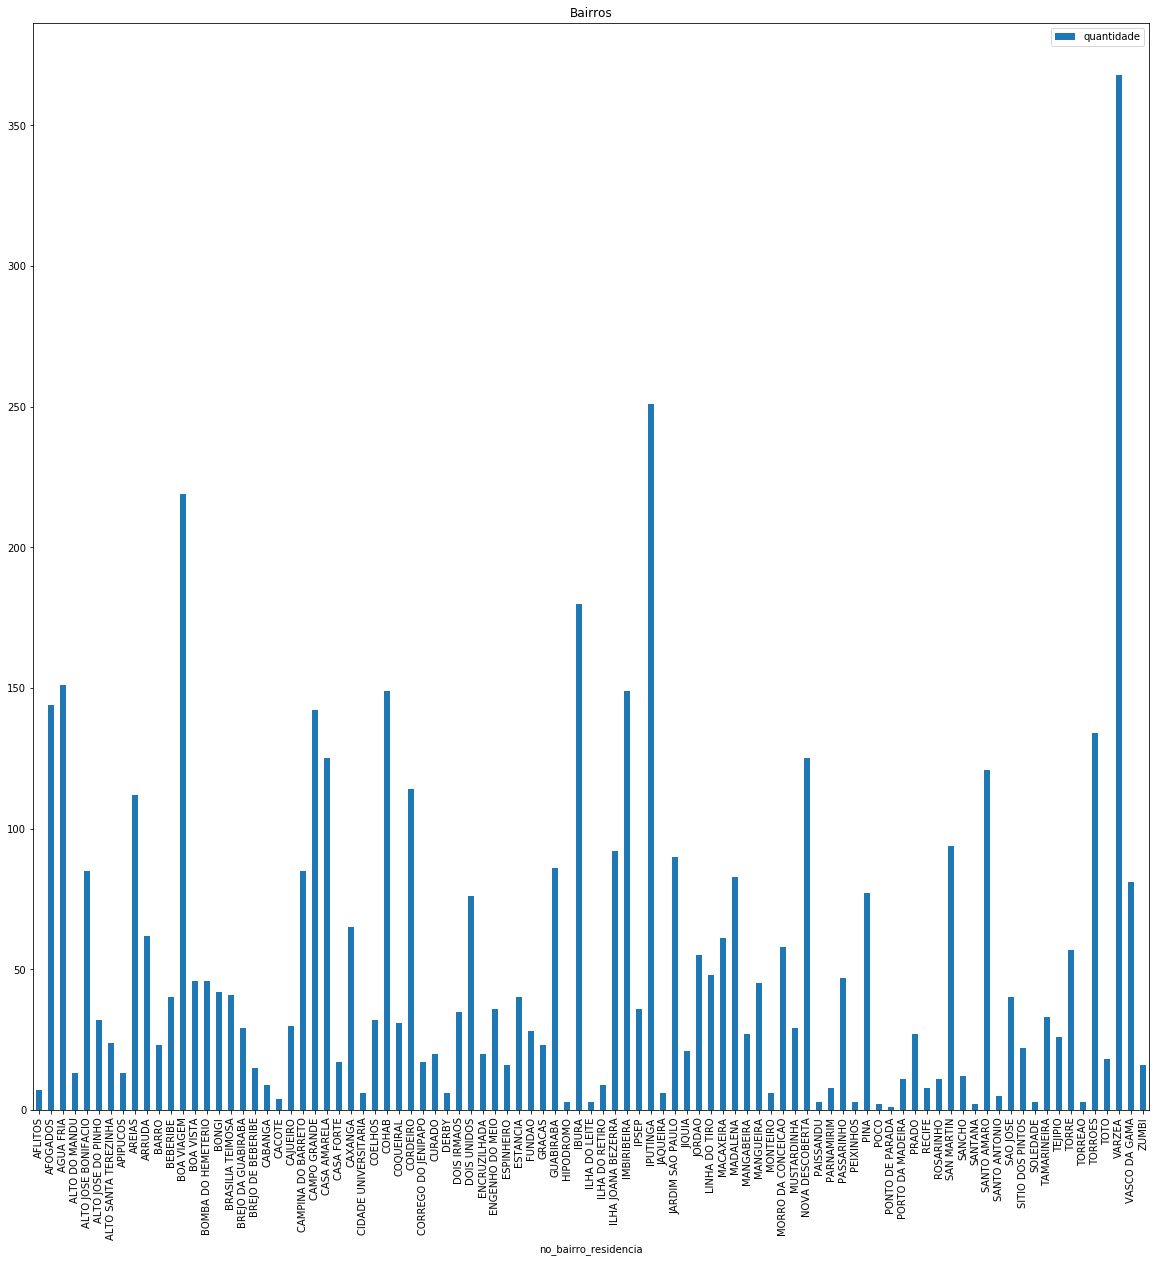

In [11]:
df_bairro.plot(kind='bar', figsize = (20,20), title="Bairros")

In [12]:
df_age.set_index('age', inplace= True)
df_age.index = df_age.index.map(int)

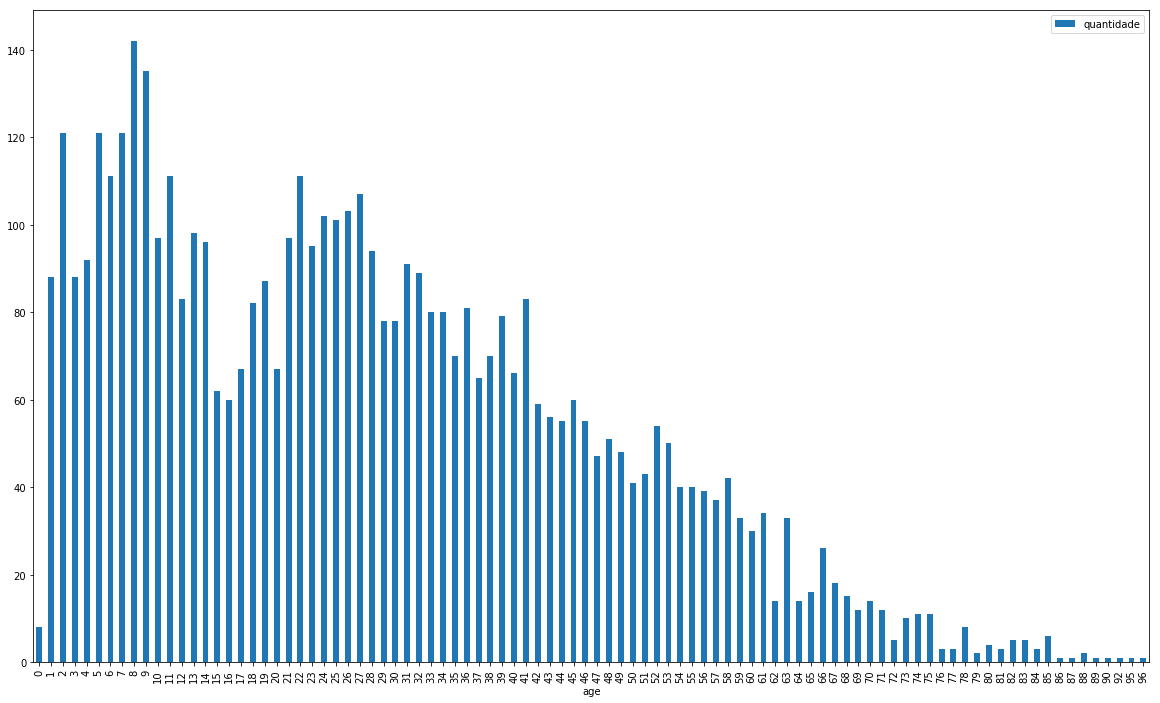

In [13]:
df_age.plot(kind='bar',figsize=(20,12))

In [14]:
df_symptom = df_filtered
#sintomas_frame.drop('quantidade')
df_symptom.drop('quantidade', axis=1, inplace=True)
df_symptom

,age,Qmialgia,Qcefaleia,Qexantema,Qvomito,Qnausea,Qdor_costas,Qconjutivite,Qartrite,Qartralgia,Qpetequia_n,Qleucopenia
0,0,3,3,3,2,1,1,4,2,1,8,2
1,1,23,24,44,31,10,3,6,4,5,16,5
2,2,31,21,71,44,12,1,3,1,8,10,4
3,3,28,17,59,41,11,1,1,2,4,7,7
4,4,29,34,33,41,11,2,4,3,3,4,12
5,5,52,64,38,69,14,6,2,2,6,9,14
6,6,53,63,35,51,11,4,3,1,9,5,13
7,7,46,67,31,55,16,2,2,4,11,6,15
8,8,63,86,26,70,19,1,4,2,9,11,14
9,9,67,87,40,53,20,5,4,2,10,3,15


In [15]:
df_symptom.set_index('age', inplace = True)

In [16]:
df_symptom.index = df_symptom.index.map(int)

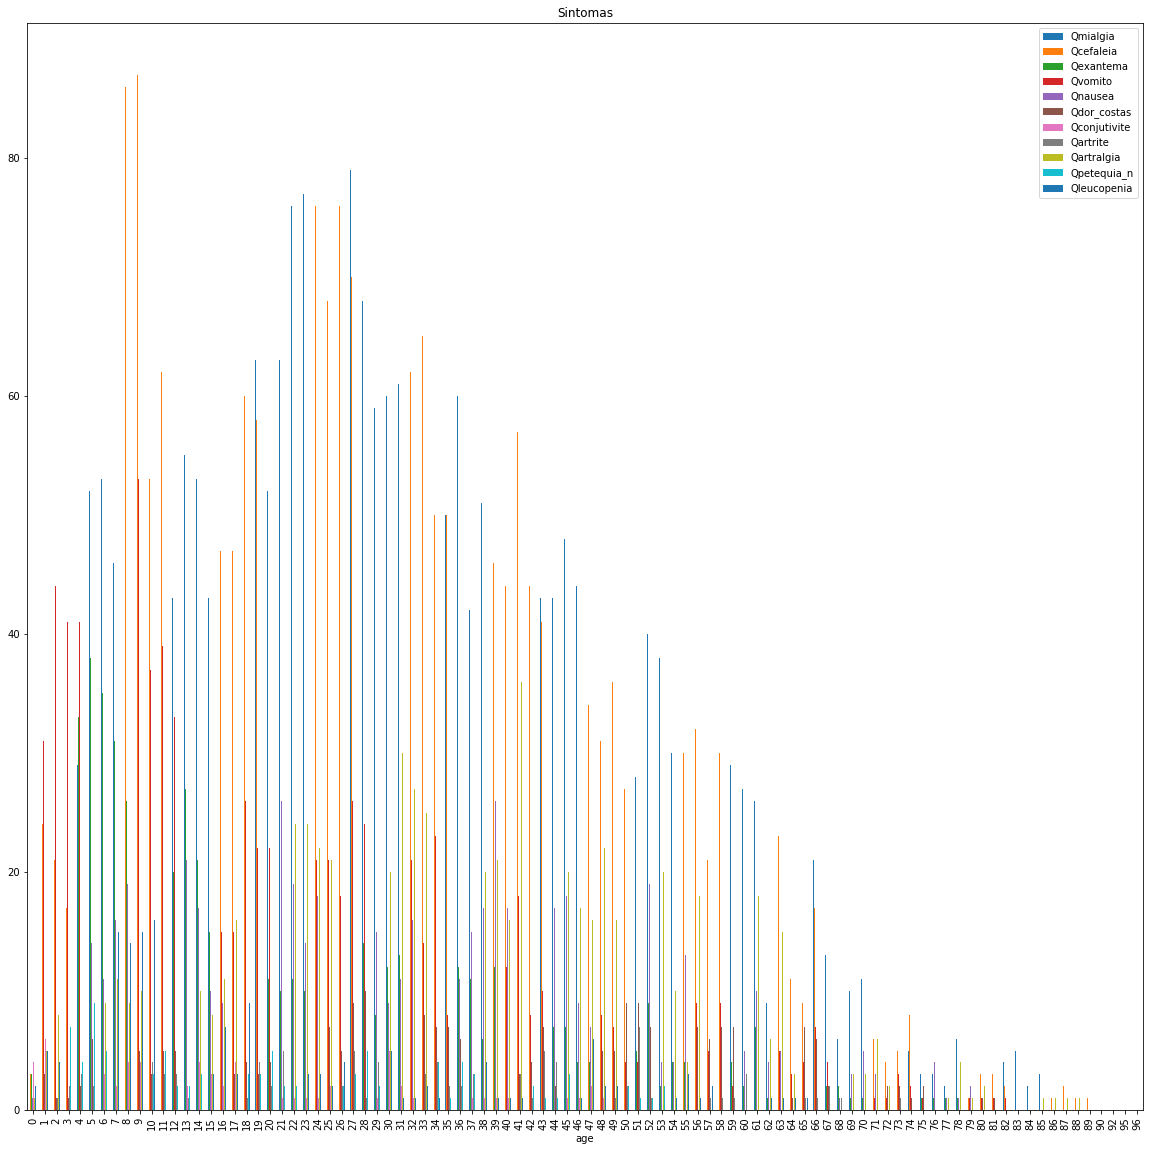

In [17]:
df_symptom.plot(kind='bar', figsize = (20,20), title="Sintomas")